In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import os
import glob
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

from utils.data import get_all_states
from utils.stats import ci, std, se

In [2]:
bdt1 = get_all_states(glob.glob(os.path.join(os.getenv('SLURM_TMPDIR'), 'BDT1/*/*.pkl')))
bdt1_transport = get_all_states(glob.glob('../2020-06-05/neurips20_binary_tracing1/*/*.pkl'))
bdt2 = get_all_states(glob.glob(os.path.join(os.getenv('SLURM_TMPDIR'), 'BDT2/*/*.pkl')))
bdt2_transport = get_all_states(glob.glob('../2020-06-05/neurips20_binary_tracing2/*/*.pkl'))
transformer = get_all_states(glob.glob(os.path.join(os.getenv('SLURM_TMPDIR'), 'RADIANT-RESONANCE-561/*/*.pkl')))

In [29]:
mlp_transport = get_all_states(glob.glob('../2020-06-05/neurips20_FIERY-YOGURT-575/*/*.pkl'))

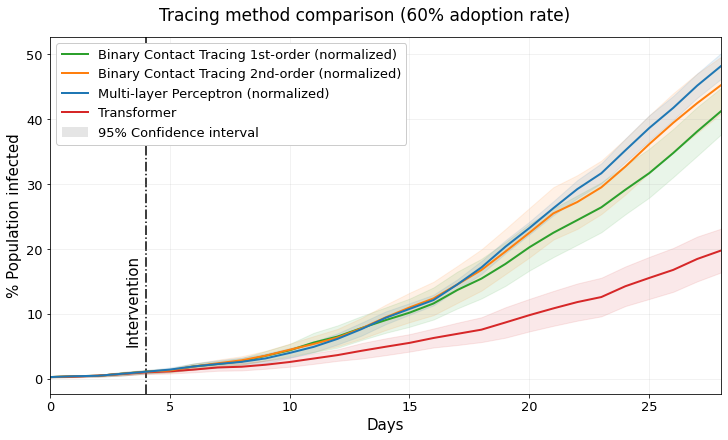

In [30]:
fig = plt.figure(figsize=(10, 6), constrained_layout=True)

gridspec = fig.add_gridspec(1, 1)

# Proportion of exposed plot
ax0 = fig.add_subplot(gridspec[0, 0])

ax0.grid(alpha=0.2)

legend_handles = [
#    Line2D([0], [0], color='C0', lw=2, label='BDT1'),
    Line2D([0], [0], color='C2', lw=2, label='Binary Contact Tracing 1st-order (normalized)'),
    Line2D([0], [0], color='C1', lw=2, label='Binary Contact Tracing 2nd-order (normalized)'),
    Line2D([0], [0], color='C0', lw=2, label='Multi-layer Perceptron (normalized)'),
    Line2D([0], [0], color='C3', lw=2, label='Transformer'),
    Patch(facecolor='gray', alpha=0.2, label='95% Confidence interval')
]

#ax0.plot(bdt1[:, 1:4].sum(1).mean(0), c='C0', lw=2)
#ax0.fill_between(np.arange(bdt1.shape[2]),
#                *std(bdt1[:, 1:4].sum(1), level=0.95, axis=0),
#                color='C0', alpha=0.1)

ax0.plot(bdt1_transport[:, 1:4].sum(1).mean(0), c='C2', lw=2)
ax0.fill_between(np.arange(bdt1_transport.shape[2]),
                *se(bdt1_transport[:, 1:4].sum(1), level=0.95, axis=0),
                color='C2', alpha=0.1)

ax0.plot(transformer[:, 1:4].sum(1).mean(0), c='C3', lw=2)
ax0.fill_between(np.arange(transformer.shape[2]),
                *se(transformer[:, 1:4].sum(1), level=0.95, axis=0),
                color='C3', alpha=0.1)

ax0.plot(bdt2_transport[:, 1:4].sum(1).mean(0), c='C1', lw=2)
ax0.fill_between(np.arange(bdt2_transport.shape[2]),
                *se(bdt2_transport[:, 1:4].sum(1), level=0.95, axis=0),
                color='C1', alpha=0.1)

ax0.plot(mlp_transport[:, 1:4].sum(1).mean(0), c='C0', lw=2)
ax0.fill_between(np.arange(mlp_transport.shape[2]),
                *se(mlp_transport[:, 1:4].sum(1), level=0.95, axis=0),
                color='C0', alpha=0.1)

ax0.set_xlim(0, 28)
ax0.text(5 - 1.2, 0.05, 'Intervention', size=15, ha='right', va='bottom', rotation=90)
ax0.axvline(4, c='k', ls='-.', zorder=0)
ax0.legend(handles=legend_handles, loc='upper left', framealpha=1.0, fontsize=13)
ax0.set_xlabel('Days', size=15)
ax0.set_ylabel('% Population infected', size=15)
ax0.yaxis.set_ticklabels(['{0:d}'.format(int(100 * y)) for y in ax0.get_yticks()])
ax0.tick_params(axis='both', which='major', labelsize=13)

plt.suptitle('Tracing method comparison (60% adoption rate)', size=17)
plt.savefig('figures/comparison-same-mobility.pdf', bbox_inches='tight', format='pdf')

plt.show()